In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.drawing.layout import spring_layout
from IPython.display import HTML
import dwave_networkx as dnx
import dimod
import warnings
warnings.simplefilter('ignore')

%matplotlib notebook

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Нажмите чтобы отобразить/скрыть код."></form>''')

# Задача коммивояжера
<br>&#8195;&#8195;В задаче коммивояжера рассматривается ݊ городов  и мат‐ рица попарных расстояний между ними. Требуется найти такой порядок  посещения  городов,  чтобы  суммарное  пройденное  расстоя‐ ние было минимальным, каждый город посещался ровно один раз и  коммивояжер  вернулся  в  тот  город,  с  которого  начал  свой  мар‐ шрут.  Другими  словами,  во  взвешенном  полном  графе  требуется найти гамильтонов цикл минимального веса. 
<br>&#8195;&#8195;Задача  коммивояжера  занимает  особое  место  в  комбина‐ торной  оптимизации  и  исследовании  операций.  Исторически  она была одной из тех задач, которые послужили толчком для развития этих направлений. Простота формулировки, конечность множества допустимых  решений,  наглядность  и,  в  тоже  время,  колоссальные затраты на полный перебор до сих пор подталкивают математиков к  разработке  все  новых  и  новых  численных  методов.  Фактически, все  свежие  идеи  сначала  тестируются  на  этой  задаче.  С  точки  зре‐ ния  приложений,  она  не  представляет  интерес.  Куда  важнее  её обобщения  для  транспорта  и  логистики,  когда  несколько  транс‐ портных  средств  ограниченной  грузоподъемности  должны  обслу‐ живать клиентов, посещая их в заданные временные окна. В задаче коммивояжера  выброшены  все  детали  приложений.  Оставлена только комбинаторная  суть, чисто математическая  проблема,  с ко‐ торой не удается справиться уже полвека. Именно этой задаче по‐ священа данная глава.

## Представление в виде графа
Симметричная задача для четырёх городов. Для возможности применения математического аппарата для решения проблемы её следует представить в виде математической модели. Проблему коммивояжёра можно представить в виде модели на графе, то есть, используя вершины и ребра между ними. Таким образом, вершины графа соответствуют городам, а рёбра (i,j) между вершинами i и j — пути сообщения между этими городами. Каждому ребру (i,j) можно сопоставить критерий выгодности маршрута $C_{i,j}$, который можно понимать как, например, расстояние между городами, время или стоимость поездки. 
<br>&#8195;&#8195;Гамильтоновым циклом называется маршрут, включающий ровно по одному разу каждую вершину графа. 
<br>&#8195;&#8195;В целях упрощения задачи и гарантии существования маршрута обычно считается, что модельный граф задачи является полностью связным, то есть, что между произвольной парой вершин существует ребро. В тех случаях, когда между отдельными городами не существует сообщения, этого можно достичь путём ввода рёбер с максимальной длиной. Из-за большой длины такое ребро никогда не попадет к оптимальному маршруту, если он существует. 
<br>&#8195;&#8195;Таким образом, решение задачи коммивояжёра — это нахождение гамильтонова цикла минимального веса в полном взвешенном графе. В зависимости от того, какой критерий выгодности маршрута сопоставляется величине ребер, различают различные варианты задачи, важнейшими из которых являются симметричная и метрическая задачи.

## Алгоритм ближайшего соседа
<br>&#8195;&#8195;Алгоритм ближайшего соседа — один из простейших эвристических алгоритмов решения задачи коммивояжёра. Относится к категории «жадных» алгоритмов.
<br>&#8195;&#8195;Формулируется следующим образом:
<br>&#8195;&#8195;Пункты обхода плана последовательно включаются в маршрут, причем каждый очередной включаемый пункт должен быть ближайшим к последнему выбранному пункту среди всех остальных, ещё не включенных в состав маршрута.
<br>&#8195;&#8195;Для любого количества городов, большего трех, в задаче коммивояжёра можно подобрать такое расположение городов (значение расстояний между вершинами графа и указание начальной вершины), что алгоритм ближайшего соседа будет выдавать наихудшее решение.

In [2]:
import numpy as np
import cvxpy as cp
import pandas as pd
import urllib
import networkx as nx
from matplotlib import pyplot as plt

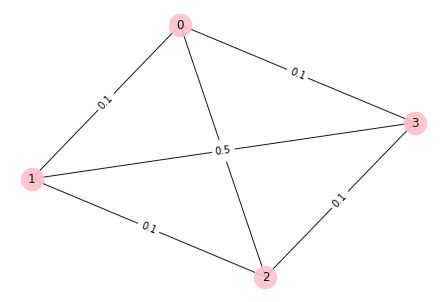

In [13]:
G = nx.Graph()

for i in range(4):
    G.add_node(i)

G.add_weighted_edges_from({(0, 1, .1), (0, 2, .5), (0, 3, .1), (1, 2, .1),(1, 3, .5), (2, 3, .1)})

pos=nx.spring_layout(G)
nx.draw(G,pos,edge_color='black',width=1,linewidths=1,node_size=500,node_color='pink',alpha=0.9,labels={node:node for node in G.nodes()}) #Отрисовка графа
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

In [16]:
import dwave_networkx as dnx
import dimod
dnx.traveling_salesperson(G, dimod.ExactSolver(), start=0)

[0, 1, 2, 3]